<a href="https://colab.research.google.com/github/ghoshraghavendra9/python/blob/main/exploratory_data_analysis_using_titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic: Machine Learning from Disaster

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.



## Goal

In this assignment, you will be asked to find insights from the data by using **pandas** to analyze and manipulate the data and **matplotlib** and **seaborn** for data visualization. You will get a bonus point if you can apply a logistic regression model to predict which passengers are more likely to survive in a separate test set. 

In [1]:
# importing libraries
import os
import io
import warnings

import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# load data
titanic = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/titanic_train.csv')
display(titanic.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Description of the data set
Here's a brief description of each column in the data.

- PassengerID: A column added by Kaggle to identify each row and make submissions easier
- Survived: Whether the passenger survived or not and the value we are predicting (0=No, 1=Yes)
- Pclass: The class of the ticket the passenger purchased (1=1st, 2=2nd, 3=3rd)
- Sex: The passenger's sex
- Age: The passenger's age in years
- SibSp: The number of siblings or spouses the passenger had aboard the Titanic
- Parch: The number of parents or children the passenger had aboard the Titanic
- Ticket: The passenger's ticket number
- Fare: The fare the passenger paid
- Cabin: The passenger's cabin number
- Embarked: The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)

In [3]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### **Question 1: Find the number of missing values for each column.**
The first step in data analysis is to identify columns with missing data. Can you find the columns in this data with missing value as well as the number of records with missing value for each column?  

Hint: you will need [isna](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isna.html) function.

In [4]:
# TODO
print("\nMissing values in the columns: \n ", titanic.isna().sum())
print("\nMissing values are present in Age-177, Cabin -687 and  Embarked -2")



Missing values in the columns: 
  PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values are present in Age-177, Cabin -687 and  Embarked -2


### **Question 2: Impute missing values.**
Now we've identified the following columns with missing values: _Age_, _Cabin_ and _Embarked_. As the next step, we want to impute those missing values. There are three ways to impute the missing values:
- A constant value that has meaning within the domain.
- The mean, median or mode value based on non-missing values of that column.
- A random value drawn from other non-missing values of that column.

Please write code to impute the missing values as follows:
- the missing values of column _age_ with the mean of that column.
- the missing values of column _Cabin_ with a constant value 'other'.
- the missing values of column _Embarked_ with the [mode](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mode.html) of that column.

In [5]:
# TODO

titanic['Age'].fillna(titanic['Age'].mean(), inplace = True)
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace = True)
titanic['Cabin'] = titanic['Cabin'].replace(np.nan,"other")
print("\nThe missing values have been imputed. So the number missing values in the data frame is 0")
titanic.isna().sum()


The missing values have been imputed. So the number missing values in the data frame is 0


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### **Question 3: What's the name of the person who has the 16th most expensive ticket?**

In [6]:
# TODO
titanic_n = titanic.sort_values('Fare', ascending = False)
print("The person with the 16th most expensive ticket:\n",titanic_n.iloc[15,3])

The person with the 16th most expensive ticket:
 Farthing, Mr. John


### **Question 4: Out of all the remales who survived, what's the name who has the 6th most expensive ticket?**

In [7]:
# TODO
titanic_exp = titanic.loc[(titanic['Survived'] == 1) & (titanic['Sex'] == 'female'),:]
titanic_exp_sort = titanic_exp.sort_values('Fare', ascending = False)
print("Out of the females who survived 6th most expensive ticket:\n",titanic_exp_sort.iloc[5,3])

Out of the females who survived 6th most expensive ticket:
 Baxter, Mrs. James (Helene DeLaudeniere Chaput)


### **Question 5: Examine the survival rate**
Calculate the survival rate for different gender and Pclass combination and use a couple of sentences to describe your findings. Hint: pivot_table is your friend.

In [8]:
# TODO
output = pd.pivot_table(data=titanic, index=['Sex', 'Pclass'],
                        values='Survived',
                        aggfunc='mean',
                        margins=True)
print(output)
print("\nOverall females have a better survival rate as compared to males and therefore could have been given priority during evacuation.\nAlso, among Pclass the Pclass 1 and Pclass 2 have a higher survival chances and so they might have also been given preference over the other group.")

               Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447
All            0.383838

Overall females have a better survival rate as compared to males and therefore could have been given priority during evacuation.
Also, among Pclass the Pclass 1 and Pclass 2 have a higher survival chances and so they might have also been given preference over the other group.


### **Question 6: Is Age or Fare an important factor to one's chance of survival?**
Visualize the distribution of Column _Age_ for both survived and non-survived population and write down your findings based on the visualization.

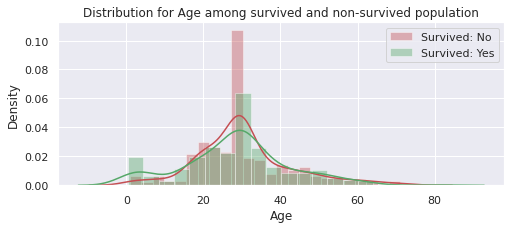

We can derive from the visualization that in the infant group majority of the infants survived and thereby it can be deferred that they were given priority. 
Also you can see a spike among the non survivers in the age group between 25-35 and also you can also suggest that maximum people in the ship belonged to this age group. 
Other than this not much can be derived from this visualization. 


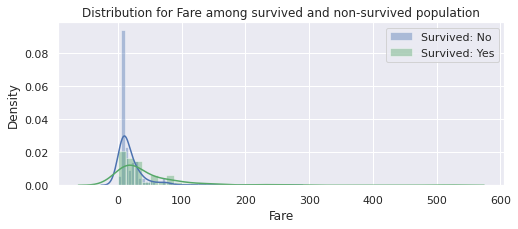

We can identify from the visualization that low fare passengers where not given priority during the evacuation and as a result we can see many non-survivors among the low fare passengers.
Other than that I do not find much relevance in the information.

Based on the visualization we observe that age and fare are important for the chances of survival as they both provide valuable insights but age seems to have more significant impact.


In [9]:
# TODO

plt.figure(figsize=(8,3))
plt.title("Distribution for Age among survived and non-survived population")
sns.distplot(titanic[titanic['Survived'] == 0]['Age'], color= 'r', label='Survived: No')
sns.distplot(titanic[titanic['Survived'] == 1]['Age'], color= 'g', label='Survived: Yes')
plt.legend()
plt.show()
print("We can derive from the visualization that in the infant group majority of the infants survived and thereby it can be deferred that they were given priority. \nAlso you can see a spike among the non survivers in the age group between 25-35 and also you can also suggest that maximum people in the ship belonged to this age group. \nOther than this not much can be derived from this visualization. ")


plt.figure(figsize=(8,3))
plt.title("Distribution for Fare among survived and non-survived population")
sns.distplot(titanic[titanic['Survived'] == 0]['Fare'], color= 'b', label='Survived: No')
sns.distplot(titanic[titanic['Survived'] == 1]['Fare'], color= 'g', label='Survived: Yes')
plt.legend()
plt.show()

print("We can identify from the visualization that low fare passengers where not given priority during the evacuation and as a result we can see many non-survivors among the low fare passengers.\nOther than that I do not find much relevance in the information.\n")

print("Based on the visualization we observe that age and fare are important for the chances of survival as they both provide valuable insights but age seems to have more significant impact.")

### **Question 7: Calculate and visualize the survival rate for discrete columns**
- Calculate the survival rate for column _SibSp_ and _Parch_.
- Use sns.barplot to visualize the survival rate for column _SibSp_ and _Parch_.

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64


No handles with labels found to put in legend.


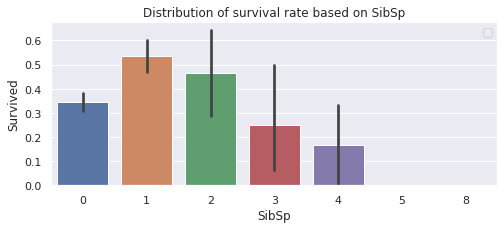

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64


No handles with labels found to put in legend.


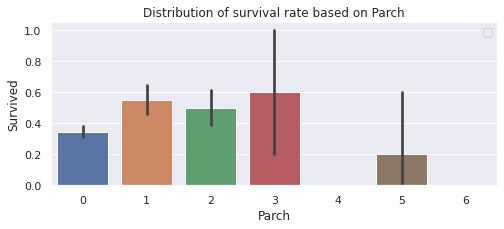

Analysis: Passengers with 1 or 2 sibblings have better chances of survival than the others. 
Passengers with 1-3 parents have a better chance of survivals than the rest of the lot.
This indirectly suggests that an optimal number of family members were necessary to improve the survival rate.


In [10]:
# TODO


plt.figure(figsize=(8,3))
plt.title("Distribution of survival rate based on SibSp")
Survival_rate_sibsp=titanic.groupby('SibSp')['Survived'].mean()
print(Survival_rate_sibsp)
ax = sns.barplot(x = 'SibSp', y = 'Survived', data = titanic)
plt.legend()
plt.show()

plt.figure(figsize=(8,3))
plt.title("Distribution of survival rate based on Parch")
Survival_rate_sibsp=titanic.groupby('Parch')['Survived'].mean()
print(Survival_rate_sibsp)
ax = sns.barplot(x = 'Parch', y = 'Survived', data = titanic)
plt.legend()
plt.show()

print("Analysis: Passengers with 1 or 2 sibblings have better chances of survival than the others. \nPassengers with 1-3 parents have a better chance of survivals than the rest of the lot.\nThis indirectly suggests that an optimal number of family members were necessary to improve the survival rate.")

### **Question 8: Find the correlations.**
Find the correlations between the feature and the target variable _Survived_ and use heatmap to visualize it. Summarize your findings.


If we analyze the first line of the heat map we see a negative correlation between Pclass and Survival rate since as we move from 


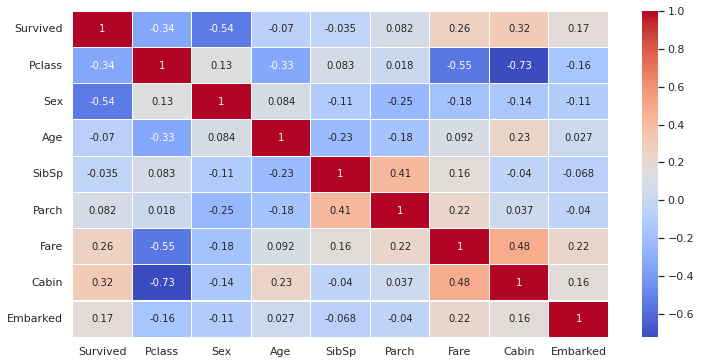

In [11]:
# TODO
titanic_new = titanic
titanic_new['Sex'] = titanic_new['Sex'].replace({'male':1,'female':0})
titanic_new['Embarked'] = titanic_new['Embarked'].replace({'C':2,'Q':1,'S':0})
titanic_new['Cabin'] = titanic_new.Cabin.replace(regex={r'^[A-Z].*':1,'other':0})
plt.figure(figsize=(12, 6))
titanic_new.drop(columns=['PassengerId','Name','Ticket'], inplace=True)
ax = sns.heatmap(titanic_new.corr(), xticklabels=titanic_new.corr().columns, yticklabels=titanic_new.corr().columns, annot=True, linewidths=.2, cmap=plt.get_cmap('coolwarm'))
print("\nIf we analyze the first line of the heat map we see a negative correlation between Pclass and Survival rate since as we move from ")

### **Question 9: Any other insights do you draw by analyzing the data? Summarize the findings as well as provide the code leading you to the findings.**

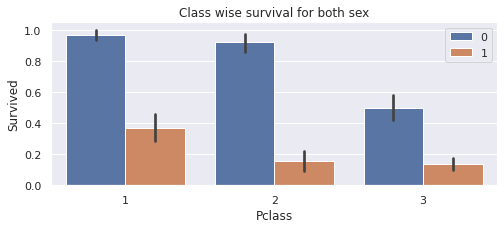


As we can see that across all the three passenger classes, females were given priority during the evacuation.
The result also suggests that across


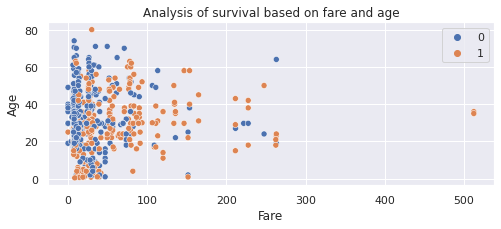


We can observe in the scattered plot that most of the infants survived so preference was given to them during the rescue operation.
Apart from that among the passengers paying more than 100 most of them survived indicating that passengers paying higher fare were on top decks and were able to be rescued easily compared to the other people who paid less and were on lower deck.


In [12]:
# TODO
## Class vs Survival
plt.figure(figsize=(8,3))
plt.title("Class wise survival for both sex")
ax = sns.barplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = titanic)
plt.legend()
plt.show()
print("\nAs we can see that across all the three passenger classes, females were given priority during the evacuation.\nThe result also suggests that across")
## 

plt.figure(figsize=(8,3))
plt.title("Analysis of survival based on fare and age")
ax = sns.scatterplot(x = 'Fare', y = 'Age', hue = 'Survived', data = titanic)
plt.legend()
plt.show()
print("\nWe can observe in the scattered plot that most of the infants survived so preference was given to them during the rescue operation.\nApart from that among the passengers paying more than 100 most of them survived indicating that passengers paying higher fare were on top decks and were able to be rescued easily compared to the other people who paid less and were on lower deck.")

### **Bonus Point: Build a ML model to predict survival.**
Can you build a logistic regression model to predict the probability of survival for all the passengers in this [file](https://raw.githubusercontent.com/zariable/data/master/titanic_test.csv)? You can evaluate your model accuracy on [Kaggle](https://www.kaggle.com/c/titanic). Can you think of any other ways to improve the model performance? Implement your idea to see if it actually works. 

In [13]:
# TODO
##training data
titanic_train = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/titanic_train.csv')
titanic_train['Age'].fillna(titanic_train['Age'].mean(), inplace = True)
titanic_train['Cabin'] = titanic_train['Cabin'].replace(np.nan,"other")
titanic_train['Embarked'].fillna(titanic_train['Embarked'].mode()[0], inplace = True)
titanic_train['Sex'] = titanic_train['Sex'].replace({'male':1,'female':0})
titanic_train['Embarked'] = titanic_train['Embarked'].replace({'C':2,'Q':1,'S':0})
titanic_train['Cabin'] = titanic_train.Cabin.replace(regex={r'^[A-Z].*':1,'other':0})
titanic_train.drop(columns=['PassengerId','Name','Ticket'], inplace=True)
display(titanic_train)



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.000000,1,0,7.2500,0,0
1,1,1,0,38.000000,1,0,71.2833,1,2
2,1,3,0,26.000000,0,0,7.9250,0,0
3,1,1,0,35.000000,1,0,53.1000,1,0
4,0,3,1,35.000000,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,0,0
887,1,1,0,19.000000,0,0,30.0000,1,0
888,0,3,0,29.699118,1,2,23.4500,0,0
889,1,1,1,26.000000,0,0,30.0000,1,2


In [14]:
##Test data
titanic_test = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/titanic_test.csv')
titanic_test['Age'].fillna(titanic_test['Age'].mean(), inplace = True)
titanic_test['Cabin'] = titanic_test['Cabin'].replace(np.nan,"other")
titanic_test['Fare'].fillna(titanic_test['Fare'].mean(), inplace = True)
titanic_test['Embarked'].fillna(titanic_test['Embarked'].mode()[0], inplace = True)
titanic_test['Sex'] = titanic_test['Sex'].replace({'male':1,'female':0})
titanic_test['Embarked'] = titanic_test['Embarked'].replace({'C':2,'Q':1,'S':0})
titanic_test['Cabin'] = titanic_test.Cabin.replace(regex={r'^[A-Z].*':1,'other':0})
titanic_test.drop(columns=['PassengerId','Name','Ticket'], inplace=True)
titanic_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,34.50000,0,0,7.8292,0,1
1,3,0,47.00000,1,0,7.0000,0,0
2,2,1,62.00000,0,0,9.6875,0,1
3,3,1,27.00000,0,0,8.6625,0,0
4,3,0,22.00000,1,1,12.2875,0,0
...,...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,0,0
414,1,0,39.00000,0,0,108.9000,1,2
415,3,1,38.50000,0,0,7.2500,0,0
416,3,1,30.27259,0,0,8.0500,0,0


In [15]:
## Logistic regression and prediction of survival

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
X_train = titanic_train.drop(columns=['Survived'], axis =1)
Y_train=titanic_train['Survived']
X_test = titanic_test
model = LogisticRegression(max_iter=1000).fit(X_train,Y_train)
print('Slope: {}'.format(model.coef_))
print('Intercept: {}'.format(model.intercept_))
Y_pred = model.predict(X_train)
Y_test = model.predict(X_test)
print("Accuracy score :\n",accuracy_score(Y_train,Y_pred))
Acc = accuracy_score(Y_train,Y_pred)*100
print("The accuracy is :",Acc)
Y_test

Slope: [[-8.39901727e-01 -2.63590897e+00 -3.93572734e-02 -3.18927916e-01
  -9.62145465e-02  1.32977553e-03  6.67348528e-01  2.12605657e-01]]
Intercept: [4.08751454]
Accuracy score :
 0.8013468013468014
The accuracy is : 80.13468013468014


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,